In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
df = pd.read_csv("./data/COMPOSED.csv")
# 数据标准化
df.set_index("Country",inplace=True)
df.apply(lambda col: list(map(lambda x: (x- col.mean())/col.std(),col)), axis=0)
df.reset_index(inplace=True)
final_score = df["complex_HH"] * 0.35 + df["complex_PRIV"] * 0.65
final_score

0     57.494732
1      5.447193
2     10.486819
3     35.529777
4     67.879098
5     51.045978
6     40.580650
7     15.958299
8      3.700237
9     27.294393
10    15.376885
11     2.386505
12    16.542439
13    57.943457
14    27.763651
15     8.091911
16    38.103628
17    29.858823
18    62.045120
19    55.604881
20    26.185458
21     3.982556
22    29.908435
23    29.866291
24    23.623924
25     4.291831
26    43.183065
27    21.393009
28    28.947668
29    31.260855
30    19.585354
31    13.311971
32     6.878146
33    19.837751
34    55.429942
dtype: float64

[None]

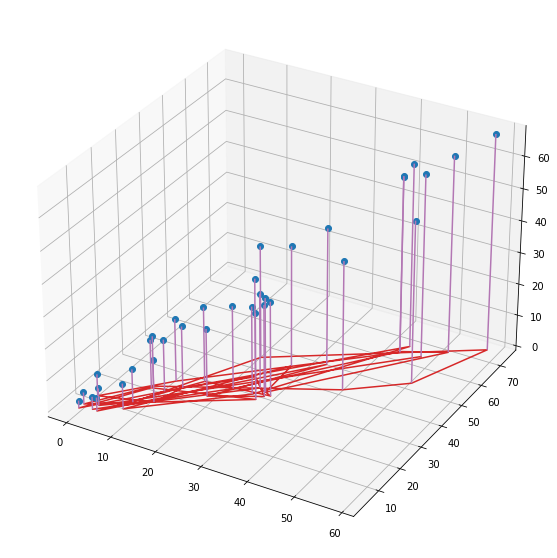

In [52]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

# for index in df.index:
#     ax.stem(x=[df["complex_HH"][index]],y=[df["complex_PRIV"][index]],z=[final_score[index]],label=df["Country"][index],markerfmt=)

markerline, stemlines, baseline = ax.stem(data=df,x="complex_HH",y="complex_PRIV",z=final_score)
# plt.setp(stemlines,"color",[[0.7, 0.46666667, 0.70588235, 1.        ]])
plt.getp(stemlines,"color")